# Table of Contents


1.[Import Packages](#1.-Importing-the-required-packages-[top])

2.[Load Dataset](#2.-Load-Dataset--[top])

3.[Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis-(EDA)-[top])

4.[Feature Selection](#4.-Feature-Selection--[top])

5.[Model Selection and Evaluation](#5.-Model-Selection-and-Evaluation-[top])
                                   

# 1. Importing the required packages [[top]](#Table-of-Contents)


In [24]:
#Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# 2. Load Dataset  [[top]](#Table-of-Contents)

In [25]:
dataset= pd.read_csv(r"C:\movie_success_rate.csv")
dataset

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.10000,757074.0000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.00000,485820.0000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.30000,157606.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.20000,60545.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.20000,393727.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,995.0,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012.0,88.0,6.70000,164088.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,997.0,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007.0,94.0,5.50000,73152.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,998.0,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008.0,98.0,6.20000,70699.0000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
837,1000.0,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016.0,87.0,5.30000,12435.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#print first 5 rows of the dataset
dataset.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#print last 5 rows of the dataset
dataset.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
834,995.0,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012.0,88.0,6.70000,164088.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,997.0,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007.0,94.0,5.50000,73152.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,998.0,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008.0,98.0,6.20000,70699.0000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
837,1000.0,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016.0,87.0,5.30000,12435.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.81432,193230.2518,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#number of rows and columns in the dataset
dataset.shape

(839, 33)

# 3. Exploratory Data Analysis (EDA) [[top]](#Table-of-Contents)

#checking for missing values
dataset.isnull().sum()

In [29]:
#removing null values
dataset.dropna(inplace=True)

In [30]:
dataset.isnull().sum()

Rank           0
Title          0
Genre          0
Description    0
Director       0
Actors         0
Year           0
Runtime        0
Rating         0
Votes          0
Revenue        0
Metascore      0
Action         0
Adventure      0
Aniimation     0
Biography      0
Comedy         0
Crime          0
Drama          0
Family         0
Fantasy        0
History        0
Horror         0
Music          0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Sport          0
Thriller       0
War            0
Western        0
Success        0
dtype: int64

In [31]:
#stastistical measures of the data
dataset.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore,Action,Adventure,Aniimation,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000,838.000000,838.000000,838.000000,...,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179,0.330549,0.291169,0.053699,...,0.023866,0.005967,0.102625,0.143198,0.127685,0.017900,0.176611,0.011933,0.004773,0.177804
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416,0.470692,0.454573,0.225558,...,0.152724,0.077059,0.303650,0.350484,0.333938,0.132666,0.381567,0.108650,0.068965,0.382576
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#checking the distribution of target variable
dataset['Success'].value_counts()

0.0    689
1.0    149
Name: Success, dtype: int64

array([[<AxesSubplot:title={'center':'Rank'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Runtime'}>,
        <AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Votes'}>],
       [<AxesSubplot:title={'center':'Revenue'}>,
        <AxesSubplot:title={'center':'Metascore'}>,
        <AxesSubplot:title={'center':'Action'}>,
        <AxesSubplot:title={'center':'Adventure'}>,
        <AxesSubplot:title={'center':'Aniimation'}>],
       [<AxesSubplot:title={'center':'Biography'}>,
        <AxesSubplot:title={'center':'Comedy'}>,
        <AxesSubplot:title={'center':'Crime'}>,
        <AxesSubplot:title={'center':'Drama'}>,
        <AxesSubplot:title={'center':'Family'}>],
       [<AxesSubplot:title={'center':'Fantasy'}>,
        <AxesSubplot:title={'center':'History'}>,
        <AxesSubplot:title={'center':'Horror'}>,
        <AxesSubplot:title={'center':'Music'}>,
        <AxesSubplot:title={'center':'Musical'}>],
      

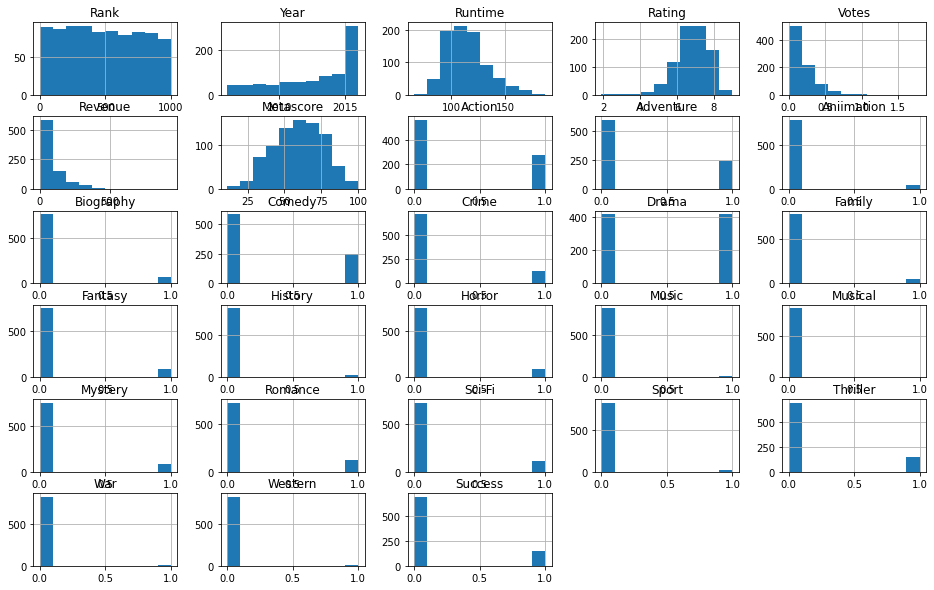

In [33]:
# Generate Histogram - It is a graphical representation of a grouped frequency distribution with continuous classes
dataset.hist(figsize=(16,10),bins=10)

In [34]:
# print the concise summary of the dataset
dataset.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 837
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         838 non-null    float64
 1   Title        838 non-null    object 
 2   Genre        838 non-null    object 
 3   Description  838 non-null    object 
 4   Director     838 non-null    object 
 5   Actors       838 non-null    object 
 6   Year         838 non-null    float64
 7   Runtime      838 non-null    float64
 8   Rating       838 non-null    float64
 9   Votes        838 non-null    float64
 10  Revenue      838 non-null    float64
 11  Metascore    838 non-null    float64
 12  Action       838 non-null    float64
 13  Adventure    838 non-null    float64
 14  Aniimation   838 non-null    float64
 15  Biography    838 non-null    float64
 16  Comedy       838 non-null    float64
 17  Crime        838 non-null    float64
 18  Drama        838 non-null    float64
 19  Family  

# 4. Feature Selection  [[top]](#Table-of-Contents)

In [35]:
# printing all columns of the dataframe
print(dataset.columns.tolist())

['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime', 'Rating', 'Votes', 'Revenue', 'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Success']


In [37]:
dataset['Runtime']

0      121.0
1      124.0
2      117.0
3      108.0
4      123.0
       ...  
833     97.0
834     88.0
835     94.0
836     98.0
837     87.0
Name: Runtime, Length: 838, dtype: float64

In [38]:
X = dataset[['Runtime','Rating','Votes','Revenue','Metascore']]
Y = dataset['Success']

In [39]:
X.head()

,Runtime,Rating,Votes,Revenue,Metascore
0,121.0,8.1,757074.0,333.13,76.0
1,124.0,7.0,485820.0,126.46,65.0
2,117.0,7.3,157606.0,138.12,62.0
3,108.0,7.2,60545.0,270.32,59.0
4,123.0,6.2,393727.0,325.02,40.0


In [40]:
Y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Success, dtype: float64

In [41]:
# Splitting the dataset into 80% training data and 20% testing data.
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20)

# A. Feature Selection - Check Missing Count

In [42]:
# Count total missing values in a dataframe
dataset.isnull().sum().sum()

0

# B. Feature Selection - Dropping constant features

Removing features with low variance
In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

In [43]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


Low Variance is not observed. So, all featuere are considered

In [44]:
corr = dataset.corr(method='pearson',min_periods=1).round(2)
corr.style.background_gradient(cmap='coolwarm')

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore,Action,Adventure,Aniimation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
Rank,1.000000,-0.310000,-0.250000,-0.240000,-0.300000,-0.270000,-0.200000,-0.140000,-0.160000,-0.000000,-0.010000,0.080000,-0.020000,0.030000,0.050000,-0.010000,-0.080000,0.080000,0.060000,0.030000,0.030000,0.100000,-0.110000,0.050000,0.020000,-0.020000,-0.020000,-0.260000
Year,-0.310000,1.000000,-0.100000,-0.150000,-0.360000,-0.130000,-0.060000,-0.010000,-0.010000,0.010000,0.050000,0.050000,-0.030000,0.050000,-0.020000,-0.090000,0.050000,0.000000,-0.050000,-0.080000,-0.070000,-0.000000,-0.040000,-0.030000,-0.030000,-0.060000,0.010000,-0.160000
Runtime,-0.250000,-0.100000,1.000000,0.370000,0.400000,0.280000,0.220000,0.090000,0.120000,-0.220000,0.140000,-0.290000,0.070000,0.200000,-0.040000,0.070000,0.160000,-0.220000,0.010000,0.050000,0.030000,-0.030000,0.060000,0.040000,-0.010000,0.010000,0.060000,0.300000
Rating,-0.240000,-0.150000,0.370000,1.000000,0.520000,0.220000,0.670000,-0.130000,-0.010000,0.130000,0.180000,-0.080000,0.040000,0.260000,-0.040000,-0.070000,0.100000,-0.200000,0.050000,0.010000,0.060000,-0.050000,-0.020000,0.040000,-0.010000,0.100000,0.030000,0.420000
Votes,-0.300000,-0.360000,0.400000,0.520000,1.000000,0.640000,0.330000,0.210000,0.240000,0.020000,-0.030000,-0.130000,0.020000,-0.130000,-0.080000,0.070000,-0.030000,-0.150000,-0.050000,-0.010000,0.030000,-0.120000,0.250000,-0.040000,0.020000,0.060000,0.070000,0.670000
Revenue,-0.270000,-0.130000,0.280000,0.220000,0.640000,1.000000,0.140000,0.290000,0.450000,0.250000,-0.070000,-0.050000,-0.080000,-0.320000,0.090000,0.160000,-0.050000,-0.150000,-0.040000,-0.000000,-0.100000,-0.160000,0.190000,-0.020000,-0.060000,-0.030000,0.020000,0.620000
Metascore,-0.200000,-0.060000,0.220000,0.670000,0.330000,0.140000,1.000000,-0.230000,-0.070000,0.150000,0.170000,-0.050000,-0.020000,0.300000,-0.050000,-0.090000,0.150000,-0.060000,0.010000,0.000000,0.030000,-0.100000,-0.030000,0.010000,0.000000,0.040000,0.020000,0.300000
Action,-0.140000,-0.010000,0.090000,-0.130000,0.210000,0.290000,-0.230000,1.000000,0.380000,-0.070000,-0.130000,-0.220000,0.070000,-0.380000,-0.110000,0.060000,-0.080000,-0.120000,-0.110000,-0.050000,-0.100000,-0.240000,0.260000,-0.020000,-0.010000,-0.010000,-0.010000,0.160000
Adventure,-0.160000,-0.010000,0.120000,-0.010000,0.240000,0.450000,-0.070000,0.380000,1.000000,0.260000,-0.130000,-0.090000,-0.220000,-0.380000,0.120000,0.190000,-0.100000,-0.180000,-0.100000,-0.050000,-0.140000,-0.220000,0.220000,-0.090000,-0.180000,-0.050000,0.030000,0.250000
Aniimation,-0.000000,0.010000,-0.220000,0.130000,0.020000,0.250000,0.150000,-0.070000,0.260000,1.000000,-0.070000,0.230000,-0.100000,-0.220000,0.100000,-0.030000,-0.040000,-0.080000,-0.040000,-0.020000,-0.080000,-0.100000,-0.090000,-0.030000,-0.110000,-0.030000,-0.020000,0.140000


# 5. Model Selection and Evaluation [[top]](#Table-of-Contents)

Cross Validation

Cross_val_score is a method which runs cross validation on a dataset to test whether the model can generalise over the whole dataset. The function returns a list of one score per split, and the average of these scores can be calculated to provide a single metric value for the dataset.

In [45]:
#understanding of Machine learning models from sklearn module.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 
               'KNeighborsClassifier',  'RandomForestClassifier', 
               'LinearDiscriminantAnalysis',  'GaussianNB', 'SVC']

#Model Preparation
num_trees = 200
max_features = 3
models = []
models.append(('LR',LogisticRegression(multi_class='ovr')))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=10)))
models.append(('RF',RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(probability=True)))

 

In [46]:
Score = pd.DataFrame({"Classifier":classifiers})

#Fit model
from sklearn.model_selection import KFold
results = []
names = []
scoring = 'accuracy'
model_score = []

for name,model in models:
    kfold = KFold(n_splits=5,shuffle=False)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_score.append(cv_results.mean()*100)
    
Score["Accuracy"] = model_score
Score.sort_values(by="Accuracy", ascending=False, inplace = True) 
Score

,Classifier,Accuracy
3,RandomForestClassifier,99.402985
1,DecisionTreeClassifier,99.104478
0,LogisticRegression,91.194030
4,LinearDiscriminantAnalysis,91.194030
5,GaussianNB,89.850746
6,SVC,88.507463
2,KNeighborsClassifier,87.910448


In [47]:
model = GaussianNB()

model.fit(X_train, Y_train)

GaussianNB()

In [48]:
y_pred = model.predict(X_test)
print(y_pred)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [49]:
result = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,y_pred)
print("Accuracy:",result2*100)

Confusion Matrix:
[[132   6]
 [  5  25]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       138
         1.0       0.81      0.83      0.82        30

    accuracy                           0.93       168
   macro avg       0.88      0.89      0.89       168
weighted avg       0.94      0.93      0.93       168

Accuracy: 93.45238095238095


In [50]:
X.head()

,Runtime,Rating,Votes,Revenue,Metascore
0,121.0,8.1,757074.0,333.13,76.0
1,124.0,7.0,485820.0,126.46,65.0
2,117.0,7.3,157606.0,138.12,62.0
3,108.0,7.2,60545.0,270.32,59.0
4,123.0,6.2,393727.0,325.02,40.0


In [51]:
prediction = model.predict([[121.0,8.1,757074.0,333.13,76.0]])
print(prediction)

[1.]


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
